In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [25]:
daily_data = pd.read_csv('daily_data_extended.csv')

In [5]:
daily_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dishwasher [kW],62.0,1.768985,0.121073,1.408661,1.678472,1.752909,1.880008,1.975244
Furnace 1 [kW],62.0,1.731330,0.155853,1.339461,1.615996,1.736385,1.847291,2.057880
Furnace 2 [kW],62.0,1.786630,0.176949,1.435114,1.701460,1.780225,1.887225,2.570772
Home office [kW],62.0,1.756069,0.177585,1.317060,1.648345,1.755935,1.888289,2.100883
Fridge [kW],62.0,1.749305,0.179464,0.858637,1.664536,1.768968,1.823350,2.142394
Wine cellar [kW],62.0,1.761457,0.195409,1.410153,1.627409,1.748830,1.847484,2.772496
Garage door [kW],62.0,1.741398,0.121890,1.500377,1.650685,1.733425,1.816990,1.988285
Kitchen 12 [kW],62.0,1.756624,0.169751,1.356657,1.647602,1.750506,1.846170,2.464499
Kitchen 14 [kW],62.0,1.729189,0.147375,1.417429,1.613935,1.745440,1.832296,2.084205
Kitchen 38 [kW],62.0,1.713266,0.205152,0.683865,1.624648,1.740251,1.818621,2.092908


In [6]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  62 non-null     object 
 1   Dishwasher [kW]       62 non-null     float64
 2   Furnace 1 [kW]        62 non-null     float64
 3   Furnace 2 [kW]        62 non-null     float64
 4   Home office [kW]      62 non-null     float64
 5   Fridge [kW]           62 non-null     float64
 6   Wine cellar [kW]      62 non-null     float64
 7   Garage door [kW]      62 non-null     float64
 8   Kitchen 12 [kW]       62 non-null     float64
 9   Kitchen 14 [kW]       62 non-null     float64
 10  Kitchen 38 [kW]       62 non-null     float64
 11  Barn [kW]             62 non-null     float64
 12  Air Conditioner [kW]  62 non-null     float64
 13  Microwave [kW]        62 non-null     float64
 14  Living room [kW]      62 non-null     float64
 15  Solar [kW]            62 

In [7]:
daily_data.head()

,time,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Air Conditioner [kW],Microwave [kW],Living room [kW],Solar [kW],use [kW],gen [kW],House overall [kW]
0,2024-04-01,1.753580,1.884450,1.819143,1.841703,1.754599,1.582495,1.664111,1.515390,1.836356,1.548747,1.821968,1.765279,1.738481,1.772804,1.879233,26.152612,1.879233,24.273379
1,2024-04-02,1.898296,1.947503,1.710453,1.801370,1.636758,1.845152,1.731229,1.896976,1.756769,1.783655,1.217269,1.786166,2.051013,1.954001,2.620729,26.756137,2.620729,24.135408
2,2024-04-03,1.926015,1.592736,1.662200,1.777207,1.533288,1.731862,1.788811,1.681176,1.583326,1.898941,1.669210,1.801595,1.457076,1.851739,1.861532,25.507891,1.861532,23.646359
3,2024-04-04,1.722288,1.744140,1.774550,1.534154,1.880384,1.777917,1.572801,1.481336,1.557249,1.573141,1.870207,1.725438,1.654444,1.802312,2.337031,25.227798,2.337031,22.890766
4,2024-04-05,1.742203,1.617616,1.782507,1.945250,1.808051,1.588405,1.968110,1.805824,1.538389,1.669022,1.760776,1.945438,1.800736,1.687231,0.591468,26.461910,0.591468,25.870443


In [8]:
daily_data.shape

(62, 19)

In [9]:
daily_data.columns

Index(['time', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Air Conditioner [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'use [kW]',
       'gen [kW]', 'House overall [kW]'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

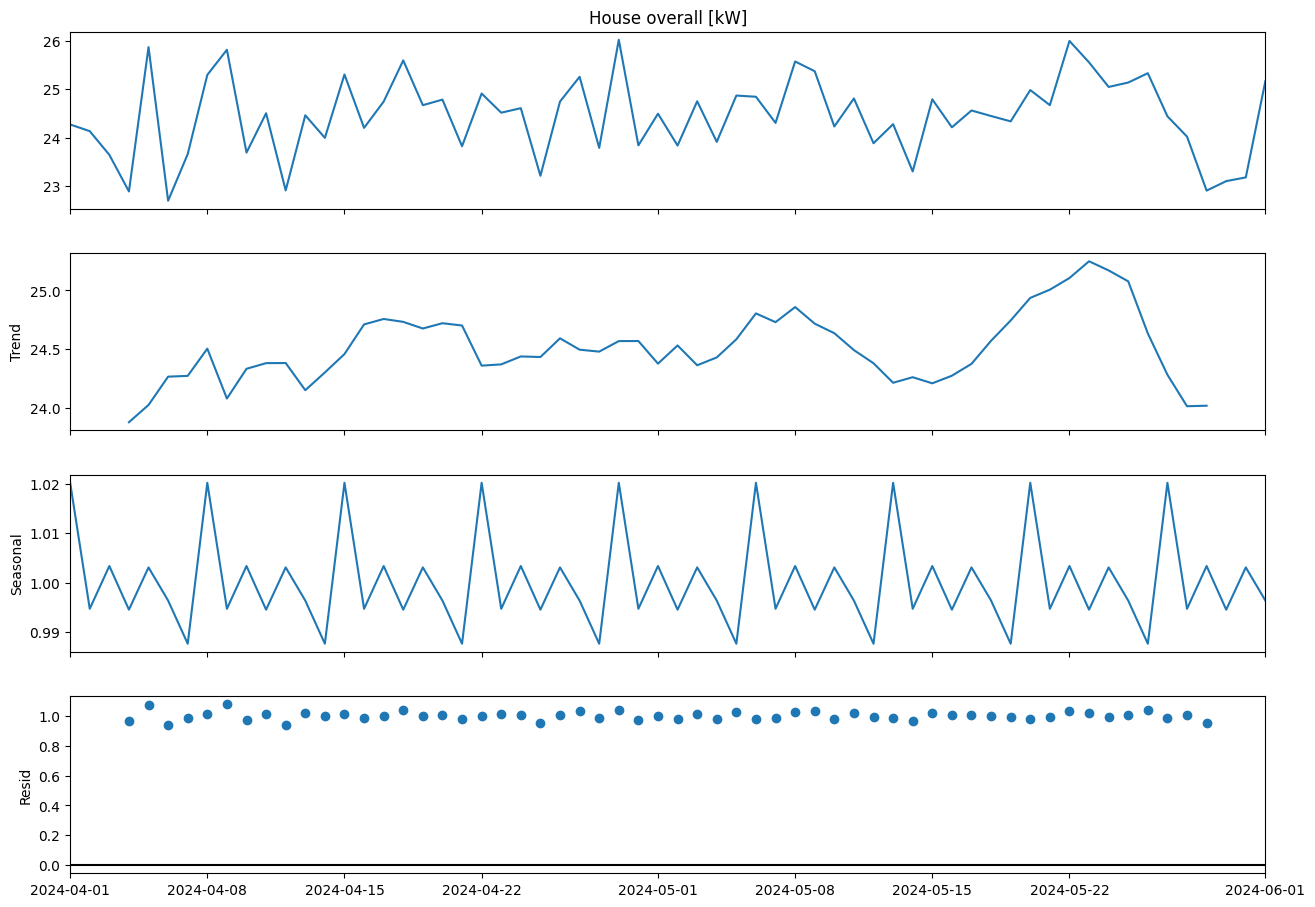

In [27]:
daily_data['time'] = pd.to_datetime(daily_data['time'])
daily_data.set_index('time', inplace=True)
daily_data = daily_data.asfreq('D')

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(daily_data["House overall [kW]"],
                            model='multiplicative',period=7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

In [42]:
daily_data = daily_data.reset_index()

In [36]:
daily_data.head()

,time,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Air Conditioner [kW],Microwave [kW],Living room [kW],Solar [kW],use [kW],gen [kW],House overall [kW]
0,2024-04-01,1.753580,1.884450,1.819143,1.841703,1.754599,1.582495,1.664111,1.515390,1.836356,1.548747,1.821968,1.765279,1.738481,1.772804,1.879233,26.152612,1.879233,24.273379
1,2024-04-02,1.898296,1.947503,1.710453,1.801370,1.636758,1.845152,1.731229,1.896976,1.756769,1.783655,1.217269,1.786166,2.051013,1.954001,2.620729,26.756137,2.620729,24.135408
2,2024-04-03,1.926015,1.592736,1.662200,1.777207,1.533288,1.731862,1.788811,1.681176,1.583326,1.898941,1.669210,1.801595,1.457076,1.851739,1.861532,25.507891,1.861532,23.646359
3,2024-04-04,1.722288,1.744140,1.774550,1.534154,1.880384,1.777917,1.572801,1.481336,1.557249,1.573141,1.870207,1.725438,1.654444,1.802312,2.337031,25.227798,2.337031,22.890766
4,2024-04-05,1.742203,1.617616,1.782507,1.945250,1.808051,1.588405,1.968110,1.805824,1.538389,1.669022,1.760776,1.945438,1.800736,1.687231,0.591468,26.461910,0.591468,25.870443


In [43]:
fig = px.line(daily_data , x='time' , y='House overall [kW]')
fig.show()

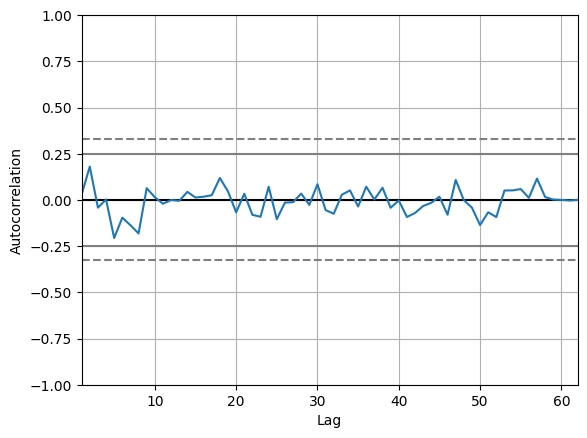

In [14]:
pd.plotting.autocorrelation_plot(daily_data["House overall [kW]"])
plt.show()

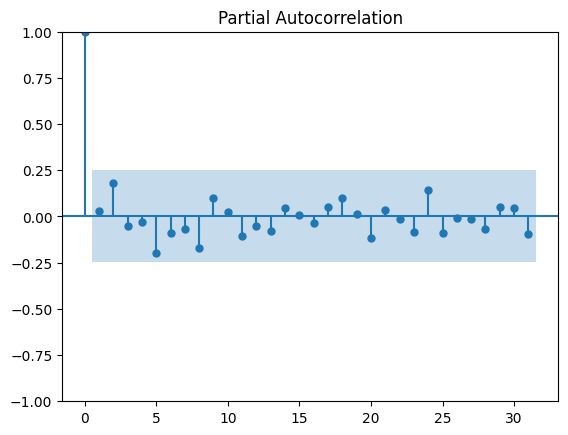

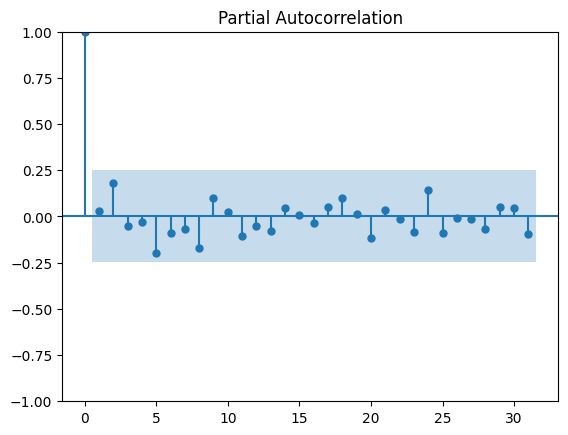

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(daily_data["House overall [kW]"],lags=31)

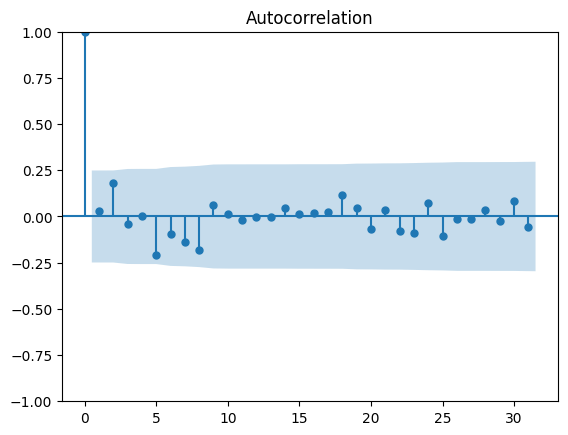

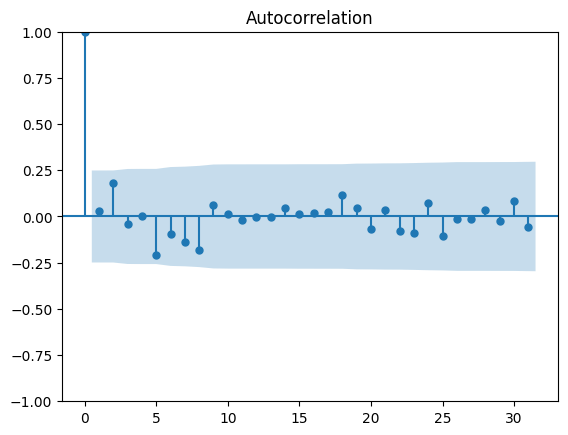

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_data["House overall [kW]"],lags=31)

In [39]:
daily_data['time'] = pd.to_datetime(daily_data['time'])
daily_data.set_index('time', inplace=True)
daily_data = daily_data.asfreq('D')

In [17]:
p, d, q = 1, 1, 1

In [40]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(daily_data["House overall [kW]"],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 7))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                House overall [kW]   No. Observations:                   62
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -75.778
Date:                           Fri, 14 Jun 2024   AIC                            161.555
Time:                                   07:46:30   BIC                            171.500
Sample:                               04-01-2024   HQIC                           165.390
                                    - 06-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0205      0.178      0.115      0.908      -0.328       0.369
ma.L1         -0.9343      0.170     -5.483

In [41]:
predictions = model.predict(len(daily_data), len(daily_data)+10)
print(predictions)

2024-06-02    24.203163
2024-06-03    24.952814
2024-06-04    24.256402
2024-06-05    25.238911
2024-06-06    24.817699
2024-06-07    24.723859
2024-06-08    24.736274
2024-06-09    24.592848
2024-06-10    24.794711
2024-06-11    24.192787
2024-06-12    24.463168
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='time'>

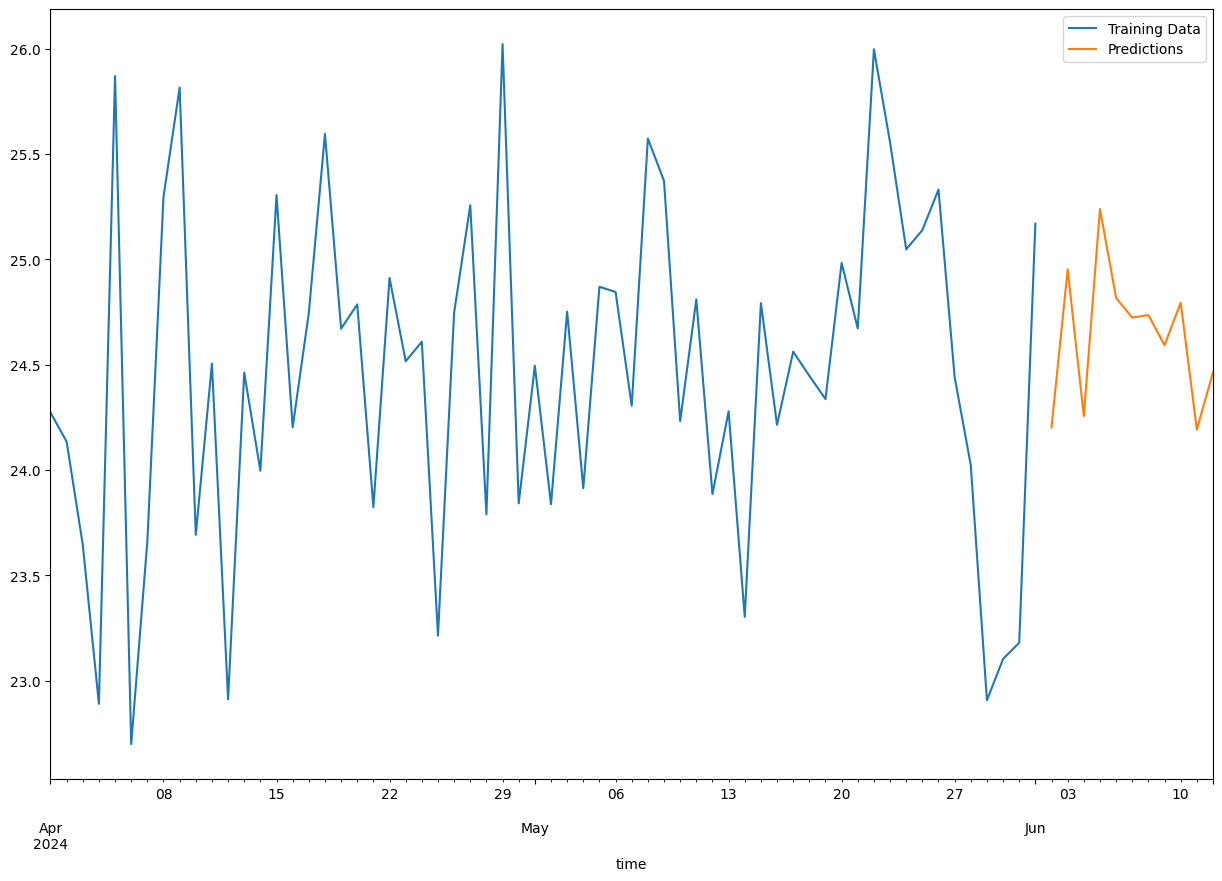

In [32]:
daily_data["House overall [kW]"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [34]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=daily_data.index,
    y=daily_data["House overall [kW]"],
    mode='lines',
    name='Training Data'
))


fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions'
))


fig.update_layout(
    title="Training Data vs Predictions",
    xaxis_title="Date",
    yaxis_title="House overall [kW]",
    legend=dict(x=0, y=1, traceorder="normal"),
    width=900,
    height=600
)


fig.show()